<H1 style="text-align: center;">Hypoglycemia Detection</H1>
<H3 style="text-align: center;">Machine Learning</H3>
###Imports

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

###Read Cleaned File

In [275]:
df = pd.DataFrame([]) # defining a dataframe
df = pd.read_csv('../Data/Cleaned/data.csv')

df['Code'] = df['Code'].astype('category')

df['Date_Time'] = pd.to_datetime(df['Date_Time'].str.strip(), 
                                 format="%Y-%m-%d %H:%M:%S", errors="raise")

df.head()

,Code,Blood_Glucose,Patient_ID,Code_Description,Date_Time
0,58,101.0,31,PRE_BREAKFAST,1991-05-20 08:00:00
1,33,5.0,31,REGULAR_INSULIN_DOSE,1991-05-20 12:00:00
2,34,27.0,31,NPH_INSULIN_DOSE,1991-05-20 08:00:00
3,60,89.0,31,PRE_LUNCH,1991-05-20 12:00:00
4,33,3.0,31,REGULAR_INSULIN_DOSE,1991-05-20 12:00:00


In [277]:
df_pivot = pd.pivot_table(df, values='Blood_Glucose', index='Patient_ID',
                     columns=['Code_Description'], aggfunc=np.mean)

In [261]:
df_pivot['Hypo_Flag'] = df_pivot['HYPOGLYCEMIC_SYMPTOMS'].notnull()
df_pivot = df_pivot.drop(['HYPOGLYCEMIC_SYMPTOMS'], axis=1)

In [278]:
#for i in range(1, 70):
#    df_pivot.loc[df_pivot.index==i] = df_pivot.loc[df_pivot.index==i].fillna(df.loc[df['Patient_ID']==1,'Blood_Glucose'].mean())
#df_pivot[df_pivot.index==1]
df_pivot.head()

Code_Description,HYPOGLYCEMIC_SYMPTOMS,LESS_EXERCISE,LESS_MEAL_INJESTION,MORE_EXERCISE,MORE_MEAL_INJESTION,NPH_INSULIN_DOSE,POST_BREAKFAST,POST_LUNCH,POST_SUPPER,PRE_BREAKFAST,PRE_LUNCH,PRE_SNACK,PRE_SUPPER,REGULAR_INSULIN_DOSE,TYPICAL_EXERCISE,TYPICAL_MEAL_INJESTION,ULTRALENTE_INSULIN_DOSE,UNKNOWN
Patient_ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,15.870229,NaN,NaN,NaN,170.069231,142.903846,NaN,160.831579,6.561644,NaN,NaN,NaN,150.153846
2,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,207.626374,173.303371,NaN,192.707865,10.045822,NaN,NaN,NaN,202.375000
3,0.0,NaN,NaN,NaN,0.0,8.000000,NaN,179.2,193.333333,118.500000,82.080000,112.533333,165.066667,2.423729,NaN,NaN,8.442857,115.666667
4,0.0,NaN,NaN,NaN,0.0,8.444444,NaN,187.5,238.400000,142.939394,107.760000,147.156250,216.612903,2.294118,NaN,NaN,8.444444,156.100000
5,NaN,NaN,NaN,NaN,0.0,8.506667,NaN,166.0,243.500000,144.400000,115.750000,148.111111,231.096774,2.362319,NaN,NaN,NaN,195.454545


In [263]:
#df_pivot = df_pivot.fillna(0)

data_array = df_pivot.values

Xs = np.array(data_array[:,0:-1], dtype='f')
ys =  np.array(data_array[:,-1], dtype='f')

X_train, X_test,y_train,  y_test = train_test_split(Xs,ys, test_size=0.3, random_state=20)

In [264]:
type(Xs)

numpy.ndarray

In [279]:
scaler = StandardScaler()
treeClassifier = DecisionTreeClassifier()

param_dist = {"max_depth": [5, None],
              "criterion": ["gini", "entropy"]}
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

gCV = GridSearchCV(treeClassifier , param_dist,cv=5 )
gCV.fit(X_train, y_train)

print("Best score is {}".format(gCV.best_score_))



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [231]:
scaler = StandardScaler()
logreg = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, {}, cv=5 )

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {}
Tuned Logistic Regression Accuracy: 0.8163265306122449


In [235]:
logreg_cv.predict(X_test)

logreg_cv.score(X_test, y_test)

0.66666666666666663

In [236]:
gCV.predict(X_test)

gCV.score(X_test, y_test)

0.61904761904761907

In [118]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [162]:
datetime.combine(df.iloc[0,4].date() - timedelta((df.iloc[0].Date_Time - pd.to_datetime('1990-01-01')).days),
                df.iloc[0,4].time()) 


datetime.datetime(1990, 1, 1, 8, 0)

In [161]:
df.iloc[0,4]

Timestamp('1991-05-20 08:00:00')

In [160]:
datetime.combine(x, df.iloc[0,4].time())

datetime.datetime(1990, 1, 1, 8, 0)

In [168]:
df['Date_Time'] - pd.to_datetime('1900-01-01', format='%Y-%m-%d').head()

AttributeError: 'Timestamp' object has no attribute 'head'

In [171]:
df['Date_Time'] - df['Date_Time'].min().head()

AttributeError: 'Timestamp' object has no attribute 'head'

In [180]:
for i in range(1, 70):
    df.loc[df['Patient_ID']==i,'time_delta'] = df.loc[df['Patient_ID']==i,'Date_Time'] - df.loc[df['Patient_ID']==i,'Date_Time'].min()

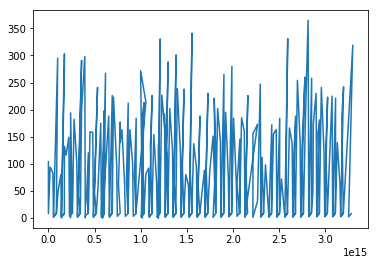

In [191]:
df4 = df.loc[df['Patient_ID']==4]

plt.plot(df4['time_delta'], df4['Blood_Glucose'])

plt.show()

In [195]:
df = df.reset_index().set_index(['time_delta'])

In [199]:
df.resample('180T').median()

AttributeError: 'Categorical' object has no attribute 'flags'

In [212]:
df.loc[df['Patient_ID']==4].iloc[:,[0,2]].resample('240T').mean().head()

,Patient_ID,Blood_Glucose
time_delta,,
00:00:00,4.0,56.0
04:00:00,4.0,94.0
08:00:00,NaN,NaN
12:00:00,4.0,29.0
16:00:00,NaN,NaN


In [ ]:
df = df.set_index('Date_Time')



In [230]:
df['Blood_Glucose'].resample('240T')

DatetimeIndexResampler [freq=<240 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]